# 第十二次作業

In [9]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import math
import statistics
from statsmodels.tsa.api import Holt
from scipy.optimize import curve_fit

In [23]:
def MAF(y_v, p):
    ma_p_a = np.zeros(len(y_v) + 1)
    ma_p_a[:] = np.nan
    mvlen = p
    for i in range(mvlen, len(y_v) + 1):
        ma_p_a[i] = np.mean(y_v[i-mvlen: i])
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = np.append(y_v, [np.nan])
    ma_df_p = pd.DataFrame({'time':t1, 'orig': org_data, 'ma_forecast': ma_p_a})
    return {"ma_forecast":ma_df_p}
def ExSm(y_v, a):
    es_df = pd.DataFrame({'orig': y_v})
    es_df['es_res'] = es_df['orig'].ewm(alpha = a, adjust= False).mean()
    es_al_a = np.zeros(len(y_v) + 1)
    es_al_a[0] = es_df['es_res'][0]
    es_al_a[1] = es_df['es_res'][0]
    for i in range(2, len(y_v) + 1):
        es_al_a[i] = es_df['es_res'][i-1]
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = y_v.tolist()
    es_df_e = pd.DataFrame({'time':t1, 'orig': np.array(org_data + [float('nan')]), 'es_forecast': es_al_a})
    return {"es_forecast":es_df_e}
def ESM(y_v, a, b, f0, t0, p):
    esm_a = np.array(y_v)
    esm_model = Holt(endog=esm_a, initialization_method='known', initial_level = f0, initial_trend = t0).fit(smoothing_level=a, smoothing_trend=b, optimized=False)
    esm_fit = esm_model.fittedvalues
    esm_fcast = esm_model.forecast(p)
    esm_ab_a = np.zeros(len(y_v) + p + 1)
    esm_ab_a[0] = f0 + t0
    for i in range(1, len(y_v) + 1):
        esm_ab_a[i] = esm_fit[i-1]
    for i in range(len(y_v) + 1, len(y_v) + p + 1):
        esm_ab_a[i] = esm_fcast[i-len(y_v)-1]
    t1 = range(0, len(y_v) + p + 1)
    Ini_v = f0 + t0
    W_ini_v = np.append(Ini_v, y_v)
    org_data = np.append(W_ini_v, [np.nan]*p)
    wsm_df_ab = pd.DataFrame({'time':t1, 'orig': org_data, 'esm_forecast': esm_ab_a})
    return {"esm_forecast":wsm_df_ab}
def ErrMetrix(y_v, f_v):
    y_v_n = pd.DataFrame({'orig': y_v})
    f_v_n = pd.DataFrame({'forecast': f_v})
    err1 = (y_v_n['orig'] - f_v_n['forecast']).dropna().values
    err1p = ((y_v_n['orig'] - f_v_n['forecast'])/ y_v_n['orig']).dropna().values
    MAD = round(np.absolute(err1).mean(),6)
    MSE = round(np.mean(err1 * err1),6)
    RMSE = round(np.sqrt(np.mean(err1 * err1)),6)
    MAPE = round(np.absolute(err1p).mean() * 100, 6)
    print("MAD = ", MAD)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAPE = ", MAPE, "%")
    return MAD, MSE, RMSE, MAPE
def objective(x, a, b, c):
    return a * x + b * x**2 + c

In [24]:
df = pd.read_excel('Xr20-01.xlsx')
df['id'] = df.index
display(df.head())

,Time series,id
0,48,0
1,41,1
2,37,2
3,32,3
4,36,4


y = 1.04820 * x + -0.07018 * x^2 + 38.77747


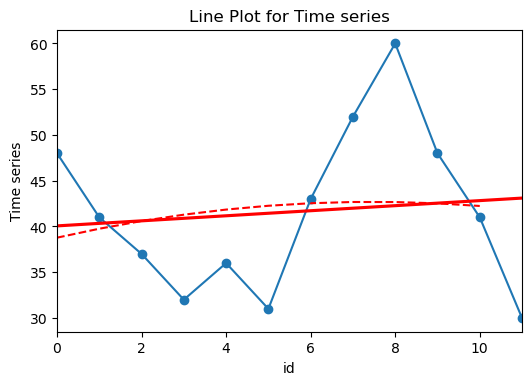

In [25]:
y_var = df['Time series'].values
x_var = df['id']
popt, _ = curve_fit(objective, x_var, y_var)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
plt.scatter(x_var, y_var)
x_line = np.arange(min(x_var), max(x_var), 1)
y_line = objective(x_line, a, b, c)
plt.plot(x_line, y_line, '--', color='red')

plt.plot(df['id'], df['Time series'])
sns.regplot(x = df['id'], y = df['Time series'], data = df, color = 'r', ci = None, scatter = False)
plt.title('Line Plot for Time series')
plt.xlabel('id')
plt.ylabel('Time series')
plt.show()

<div style="background-color:#D9D9D9;"><font size="5"> Using Xr20-01 to forecast the next period by 3-MA and ES(0.8)</font></div>

,time,orig,ma_forecast
0,1.0,48.0,NaN
1,2.0,41.0,NaN
2,3.0,37.0,NaN
3,4.0,32.0,42.000000
4,5.0,36.0,36.666667
5,6.0,31.0,35.000000
6,7.0,43.0,33.000000
7,8.0,52.0,36.666667
8,9.0,60.0,42.000000
9,10.0,48.0,51.666667


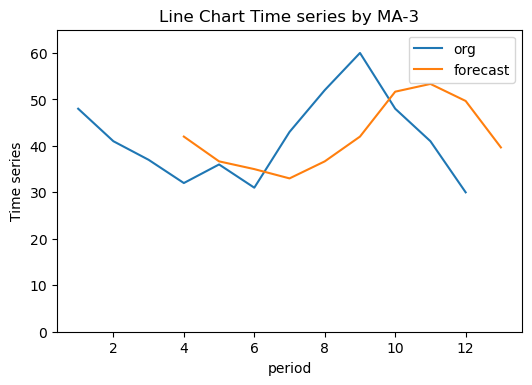

In [26]:
ch20_ts1 = np.array(df['Time series'])
ma03_result = MAF(ch20_ts1, 3)
ma03_result_df = []
ma03_result_df = pd.DataFrame(ma03_result['ma_forecast'])
display(ma03_result_df)

plt.plot(ma03_result_df['time'], ma03_result_df['orig'])
plt.plot(ma03_result_df['time'], ma03_result_df['ma_forecast'])
plt.ylim(0, max(ch20_ts1)+5)
plt.legend(labels=['org', 'forecast'])
plt.xlabel('period')
plt.ylabel('Time series')
plt.title('Line Chart Time series by MA-3')
plt.show()

,time,orig,es_forecast
0,1.0,48.0,48.000000
1,2.0,41.0,48.000000
2,3.0,37.0,42.400000
3,4.0,32.0,38.080000
4,5.0,36.0,33.216000
5,6.0,31.0,35.443200
6,7.0,43.0,31.888640
7,8.0,52.0,40.777728
8,9.0,60.0,49.755546
9,10.0,48.0,57.951109


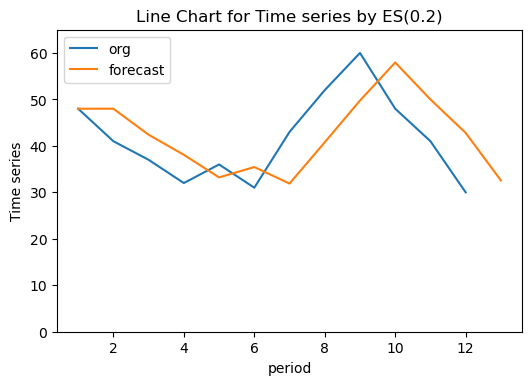

In [27]:
es02_result = ExSm(ch20_ts1, 0.8)
es02_result_df = []
es02_result_df = pd.DataFrame(es02_result['es_forecast'])
display(es02_result_df)
plt.plot(es02_result_df['time'], es02_result_df['orig'])
plt.plot(es02_result_df['time'], es02_result_df['es_forecast'])
plt.ylim(0, max(ch20_ts1)+5)
plt.legend(labels=['org', 'forecast'])
plt.xlabel('period')
plt.ylabel('Time series')
plt.title('Line Chart for Time series by ES(0.2)')
plt.show()

<div style="background-color:#D9D9D9;"><font size="5"> Apply EST with a = 0.8 and b = 0.2 to (F0 = Y0 = 48, ET0 = 1) forecast the next period by using Xr20-015</font></div>

,time,orig,esm_forecast
0,0,49.0,49.000000
1,1,48.0,49.000000
2,2,41.0,49.040000
3,3,37.0,42.161600
4,4,32.0,36.760064
5,5,36.0,30.918147
6,6,31.0,33.762860
7,7,43.0,29.889745
8,8,52.0,40.812763
9,9,60.0,51.987324


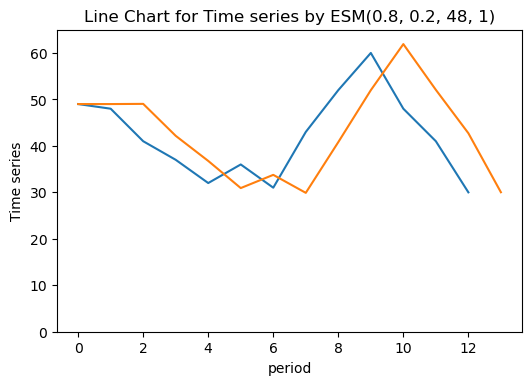

In [28]:
esm_ab_result = ESM(ch20_ts1, 0.8, 0.2, 48, 1, 1)
esm_ab_result_df = []
esm_ab_result_df = pd.DataFrame(esm_ab_result['esm_forecast'])
display(esm_ab_result_df)
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['orig'])
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['esm_forecast'])
plt.ylim(0, max(ch20_ts1)+5)
plt.xlabel('period')
plt.ylabel('Time series')
plt.title('Line Chart for Time series by ESM(0.8, 0.2, 48, 1)')
plt.show()

<div style="background-color:#D9D9D9;"><font size="5"> For Xr20-01: (1) 3-MA, (2) ES(0.8) and (3) EST (0.8, 0.2). compare three results by MSE, MAD, and MAPE</font></div>

In [29]:
f_p = len(ch20_ts1)
orig_result_a = np.array(ma03_result_df['orig'][3:f_p])
ma03_result_a = np.array(ma03_result_df['ma_forecast'][3:f_p])
es02_result_a = np.array(es02_result_df['es_forecast'][3:f_p])
esm_ab_result_a = np.array(esm_ab_result_df['esm_forecast'][4:f_p+1])
curvefit_result_a = np.array(y_line[3:f_p])
print('Error Metrics for Moving Average with n = 3')
MA03_Err_M = ErrMetrix(orig_result_a, ma03_result_a)
print('\n')
print('Error Metrics for Exponential Smoothing with alpha = 0.8')
ES02_Err_M = ErrMetrix(orig_result_a, es02_result_a)
print('\n')
print('Error Metrics for Holts Exponential Smoothing with alpha = 0.8 and beta = 0.2')
ESMAB_Err_M = ErrMetrix(orig_result_a, esm_ab_result_a)
print('\n')
print('Error Metrics for Curve Fit')
CURVE_Err_M = ErrMetrix(orig_result_a, curvefit_result_a)
ErrM_id = ['MAD', 'MSE', 'RMSE', 'MAPE']
df20_ts2_ErrM_a = np.array([ErrM_id, MA03_Err_M, ES02_Err_M, ESMAB_Err_M, CURVE_Err_M])
df20_ts2_ErrM_df = pd.DataFrame(df20_ts2_ErrM_a.T, columns = ['ErrM', 'MA03', 'ES08', 'ESMab', 'Regressioin'])
print('dataset:')
display(df20_ts2_ErrM_df)

Error Metrics for Moving Average with n = 3
MAD =  10.407407
MSE =  147.54321
RMSE =  12.146737
MAPE =  25.780424 %


Error Metrics for Exponential Smoothing with alpha = 0.8
MAD =  8.624962
MSE =  84.716471
RMSE =  9.204155
MAPE =  21.208999 %


Error Metrics for Holts Exponential Smoothing with alpha = 0.8 and beta = 0.2
MAD =  9.178535
MSE =  99.443016
RMSE =  9.972112
MAPE =  22.402976 %


Error Metrics for Curve Fit
MAD =  7.528596
MSE =  83.28768
RMSE =  9.126208
MAPE =  17.990281 %
dataset:


,ErrM,MA03,ES08,ESMab,Regressioin
0,MAD,10.407407,8.624962,9.178535,7.528596
1,MSE,147.54321,84.716471,99.443016,83.28768
2,RMSE,12.146737,9.204155,9.972112,9.126208
3,MAPE,25.780424,21.208999,22.402976,17.990281


### Which method to use? <br>
criteria MSE : MA03 > ES(0.8) > EST(0.8,0.2)   <br>
criteria MAD : MA03 > ES(0.8) > EST(0.8,0.2) <br>
criteria MAPE : MA03 > ES(0.8) > EST(0.8,0.2) <br>
According to the result, we can show that using the exponential smoothing(0.8) is the best forecasting method for the time series ,since its values are the smallest among MSE, MAD, and MAPE.